# COGS109 - Group Project

In [184]:
# essentials
import pandas as pd
import numpy as np

import ast

# graphics
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format ='retina'

## Setup
- Question: How do we predict the success of a movie given its features including budget, genres, producer, production companies, production country, etc.?


- Dataset: movie metadata from TMDB 
    - link: https://www.kaggle.com/rounakbanik/the-movies-dataset
    - number of observations: 45466
    

## Load Data

In [185]:
df = pd.read_csv('data/movies_metadata.csv')
df.transpose()

/Users/yufeideng/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,0,1,2,3,4,5,6,7,8,9,...,45456,45457,45458,45459,45460,45461,45462,45463,45464,45465
adult,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col...",NaN,NaN,NaN,NaN,"{'id': 645, 'name': 'James Bond Collection', '...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
budget,30000000,65000000,0,16000000,0,60000000,58000000,0,35000000,58000000,...,0,0,0,0,0,0,0,0,0,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",...,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...","[{'id': 9648, 'name': 'Mystery'}, {'id': 27, '...","[{'id': 27, 'name': 'Horror'}]","[{'id': 878, 'name': 'Science Fiction'}]","[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...","[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...","[{'id': 18, 'name': 'Drama'}]","[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",[],[]
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.mgm.com/view/movie/757/Goldeneye/,...,NaN,NaN,NaN,NaN,NaN,http://www.imdb.com/title/tt6209470/,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862,949,11860,45325,9091,710,...,84419,390959,289923,222848,30840,439050,111109,67758,227506,461257
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041,tt0113277,tt0114319,tt0112302,tt0114576,tt0113189,...,tt0038621,tt0265736,tt0252966,tt0112613,tt0102797,tt6209470,tt2028550,tt0303758,tt0008536,tt6980792
original_language,en,en,en,en,en,en,en,en,en,en,...,en,en,en,en,en,fa,tl,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II,Heat,Sabrina,Tom and Huck,Sudden Death,GoldenEye,...,House of Horrors,Shadow of the Blair Witch,The Burkittsville 7,Caged Heat 3000,Robin Hood,رگ خواب,Siglo ng Pagluluwal,Betrayal,Satana likuyushchiy,Queerama
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...,"Obsessive master thief, Neil McCauley leads a ...",An ugly duckling having undergone a remarkable...,"A mischievous young boy, Tom Sawyer, witnesses...",International action superstar Jean Claude Van...,James Bond must unmask the mysterious head of ...,...,An unsuccessful sculptor saves a madman named ...,"In this true-crime documentary, we delve into ...",A film archivist revisits the story of Rustin ...,It's the year 3000 AD. The world's most danger...,"Yet another version of the classic epic, with ...",Rising and falling between a man and woman.,An artist struggles to finish his work while a...,"When one of her hits goes wrong, a professiona...","In a small town live two brothers, one a minis...",50 years after decriminalisation of homosexual...


In [186]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

### Features
- __adult__: Indicates if the movie is X-Rated or Adult.
- __belongs_to_collection__: A stringified dictionary that gives information on the movie series the particular film belongs to.
- __budget__: The budget of the movie in dollars.
- __genres__: A stringified list of dictionaries that list out all the genres associated with the movie.
- __homepage__: The Official Homepage of the move.
- __id__: The ID of the move.
- __imdb_id__: The IMDB ID of the movie.
- __original_language__: The language in which the movie was originally shot in.
- __original_title__: The original title of the movie.
- __overview__: A brief blurb of the movie.
- __popularity__: The Popularity Score assigned by TMDB.
- __poster_path__: The URL of the poster image.
- __production_companies__: A stringified list of production companies involved with the making of the movie.
- __production_countries__: A stringified list of countries where the movie was shot/produced in.
- __release_date__: Theatrical Release Date of the movie.
- __revenue__: The total revenue of the movie in dollars.
- __runtime__: The runtime of the movie in minutes.
- __spoken_languages__: A stringified list of spoken languages in the film.
- __status__: The status of the movie (Released, To Be Released, Announced, etc.)
- __tagline__: The tagline of the movie.
- __title__: The Official Title of the movie.
- __video__: Indicates if there is a video present of the movie with TMDB.
- __vote_average__: The average rating of the movie.
- __vote_count__: The number of votes by users, as counted by TMDB

In [187]:
df = df.drop(columns=['homepage','original_title','poster_path'])



### Adult

In [188]:
df = df.drop(df[df['adult']!='False'].index)

In [189]:
print(df['adult'].unique(), df.shape)

['False'] (45454, 21)


### Belongs to collection

In [190]:
# df['belongs_to_collection'] = df['belongs_to_collection'].fillna("[]")
df['belongs_to_collection'] = df[df['belongs_to_collection'].notna()]['belongs_to_collection'].apply(
    ast.literal_eval).apply(lambda x: x['name'])


In [191]:
df_col = df.loc[:,['belongs_to_collection','vote_average', 'vote_count']]
df_col

,belongs_to_collection,vote_average,vote_count
0,Toy Story Collection,7.7,5415.0
1,NaN,6.9,2413.0
2,Grumpy Old Men Collection,6.5,92.0
3,NaN,6.1,34.0
4,Father of the Bride Collection,5.7,173.0
...,...,...,...
45461,NaN,4.0,1.0
45462,NaN,9.0,3.0
45463,NaN,3.8,6.0
45464,NaN,0.0,0.0


In [192]:
df['belongs_to_collection'] = df['belongs_to_collection'].apply(
    lambda x: 1 if type(x)==str else 0)
df['belongs_to_collection'].unique()

array([1, 0])

In [193]:
df_collection = df_col.pivot_table(index='belongs_to_collection',
                                   values=['vote_average','vote_count'],
                                   aggfunc={'vote_average':['count','mean'],
                                            'vote_count': 'sum'}).reset_index()

df_collection.columns = ['collection','count','vote_average','vote_count']
df_collection = df_collection.sort_values(by='vote_count', ascending=False).head()

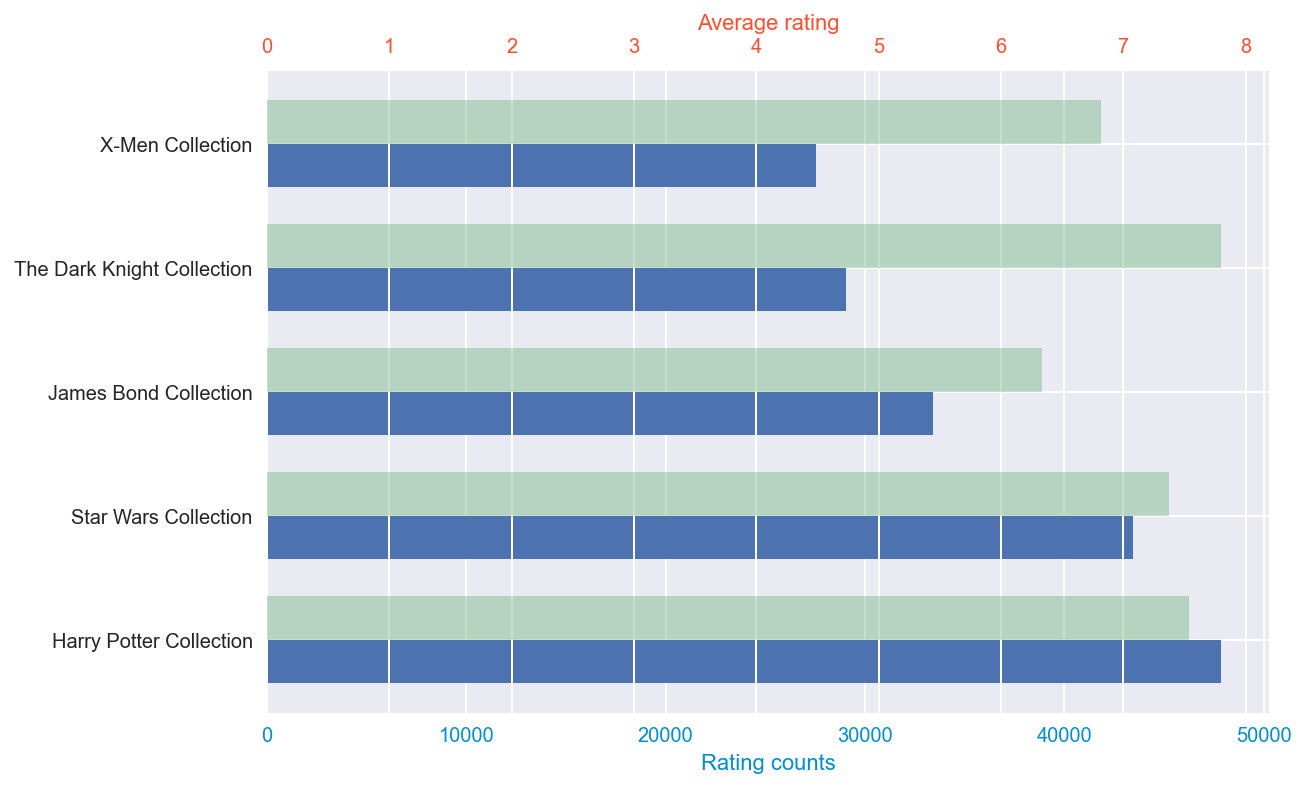

In [194]:
fig, ax1 = plt.subplots()

y= df_collection['collection'][:10]
y_pos = np.arange(len(y))
h=0.35
ax1.barh(y_pos - h/2, df_collection['vote_count'],
         color='C6',height=h )
ax1.set_yticks(y_pos)
ax1.set_yticklabels(y)
ax1.set_xlabel('Rating counts', color='C6')
ax1.tick_params(axis='x', labelcolor='C6')

ax2 = ax1.twiny()
ax2.barh(y_pos + h/2, df_collection['vote_average'],
         color='C1', height=h, alpha=0.35)
ax2.set_xlabel('Average rating',color='C1')
ax2.tick_params(axis='x', labelcolor='C1')

plt.style.use('fivethirtyeight')
plt.show()

### Genres

In [195]:
df['genres'] = df['genres'].apply(ast.literal_eval).apply(
    lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [196]:
df['genres'].head()

0     [Animation, Comedy, Family]
1    [Adventure, Fantasy, Family]
2               [Romance, Comedy]
3        [Comedy, Drama, Romance]
4                        [Comedy]
Name: genres, dtype: object

In [197]:
genres = []
for x in df['genres']:
    genres.extend(x)
genres = set(genres)
print(set(genres))

{'Comedy', 'Thriller', 'Mystery', 'Crime', 'Fantasy', 'Documentary', 'Foreign', 'Action', 'History', 'Music', 'Animation', 'Horror', 'Adventure', 'War', 'Western', 'Family', 'Drama', 'Science Fiction', 'TV Movie', 'Romance'}


In [198]:
def genre_classifier(x=genres):
    for genre in x:
        df[genre] = df['genres'].apply(lambda x: 1 if genre in x else 0)
    
    return df
df = genre_classifier()

In [199]:
genr_df = df.iloc[:,-20:]
genr_df[:3]

,Comedy,Thriller,Crime,Documentary,Action,Horror,War,Western,Drama,TV Movie,Mystery,Fantasy,Foreign,History,Music,Animation,Adventure,Family,Science Fiction,Romance
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [200]:
count = []
for genre in genr_df.columns:
    count.append(genr_df[genre].value_counts()[1])

In [201]:
data={'genre':genr_df.columns,'movies':count}
pop_genr = pd.DataFrame(data)
pop_genr = pop_genr.sort_values(by='movies', ascending=False)
pop_genr.head()

,genre,movies
8,Drama,20263
0,Comedy,13179
1,Thriller,7622
19,Romance,6733
4,Action,6596


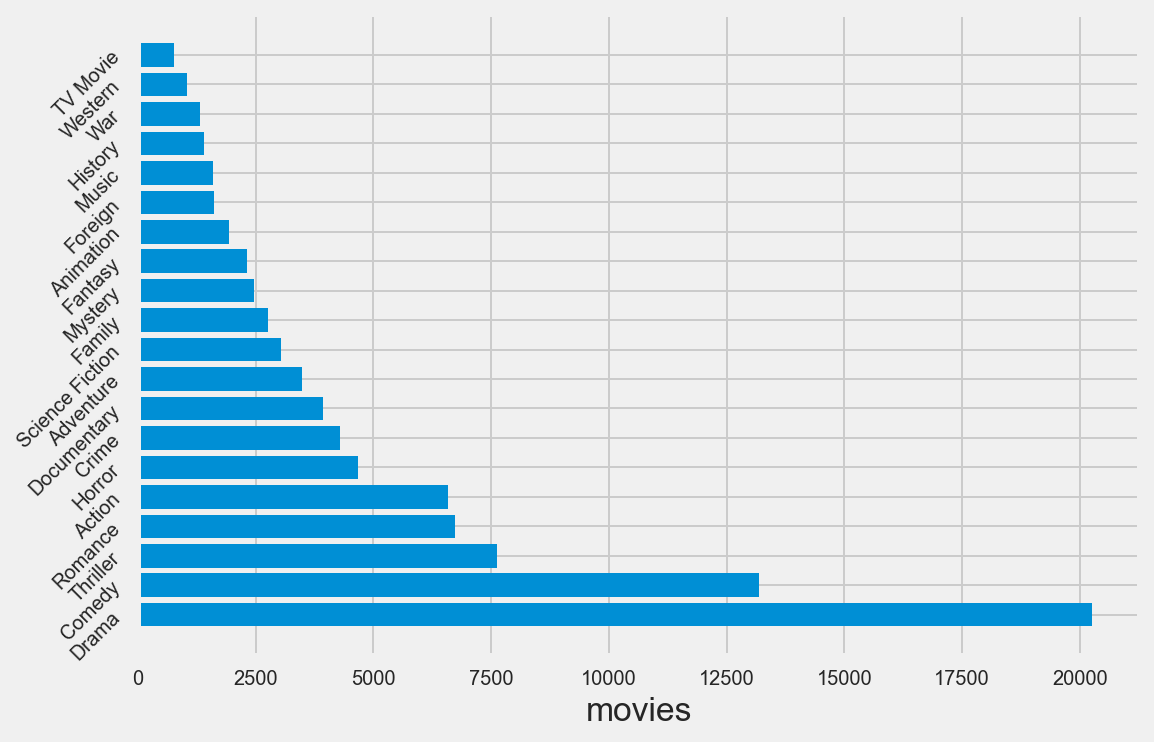

In [202]:
plt.barh('genre','movies',data=pop_genr)
plt.yticks(rotation=45)
plt.style.use('seaborn')
plt.xlabel('movies')
plt.show()

### Budget 

In [203]:
df['budget'] = df['budget'].astype('int')

In [204]:
df['budget'] = df['budget'].replace(0, np.nan)

In [206]:
df[df['budget'].isnull()]

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,overview,popularity,production_companies,...,Mystery,Fantasy,Foreign,History,Music,Animation,Adventure,Family,Science Fiction,Romance
2,False,1,NaN,"[Romance, Comedy]",15602,tt0113228,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,0,0,0,0,0,0,0,0,0,1
4,False,1,NaN,[Comedy],11862,tt0113041,en,Just when George Banks has recovered from his ...,8.38752,"[{'name': 'Sandollar Productions', 'id': 5842}...",...,0,0,0,0,0,0,0,0,0,0
7,False,0,NaN,"[Action, Adventure, Drama, Family]",45325,tt0112302,en,"A mischievous young boy, Tom Sawyer, witnesses...",2.56116,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,0,0,0,0,0,0,1,1,0,0
11,False,0,NaN,"[Comedy, Horror]",12110,tt0112896,en,When a lawyer shows up at the vampire's doorst...,5.43033,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,0,0,0,0,0,0,0,0,0,0
12,False,1,NaN,"[Family, Animation, Adventure]",21032,tt0112453,en,An outcast half-wolf risks his life to prevent...,12.1407,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",...,0,0,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,0,NaN,"[Drama, Family]",439050,tt6209470,fa,Rising and falling between a man and woman.,0.072051,[],...,0,0,0,0,0,0,0,1,0,0
45462,False,0,NaN,[Drama],111109,tt2028550,tl,An artist struggles to finish his work while a...,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]",...,0,0,0,0,0,0,0,0,0,0
45463,False,0,NaN,"[Action, Drama, Thriller]",67758,tt0303758,en,"When one of her hits goes wrong, a professiona...",0.903007,"[{'name': 'American World Pictures', 'id': 6165}]",...,0,0,0,0,0,0,0,0,0,0
45464,False,0,NaN,[],227506,tt0008536,en,"In a small town live two brothers, one a minis...",0.003503,"[{'name': 'Yermoliev', 'id': 88753}]",...,0,0,0,0,0,0,0,0,0,0


In [23]:
df[['title','budget']].sort_values(by='budget',ascending=False).head()

,title,budget
17124,Pirates of the Caribbean: On Stranger Tides,380000000.0
11827,Pirates of the Caribbean: At World's End,300000000.0
26558,Avengers: Age of Ultron,280000000.0
11067,Superman Returns,270000000.0
16130,Tangled,260000000.0


21606623.53436832

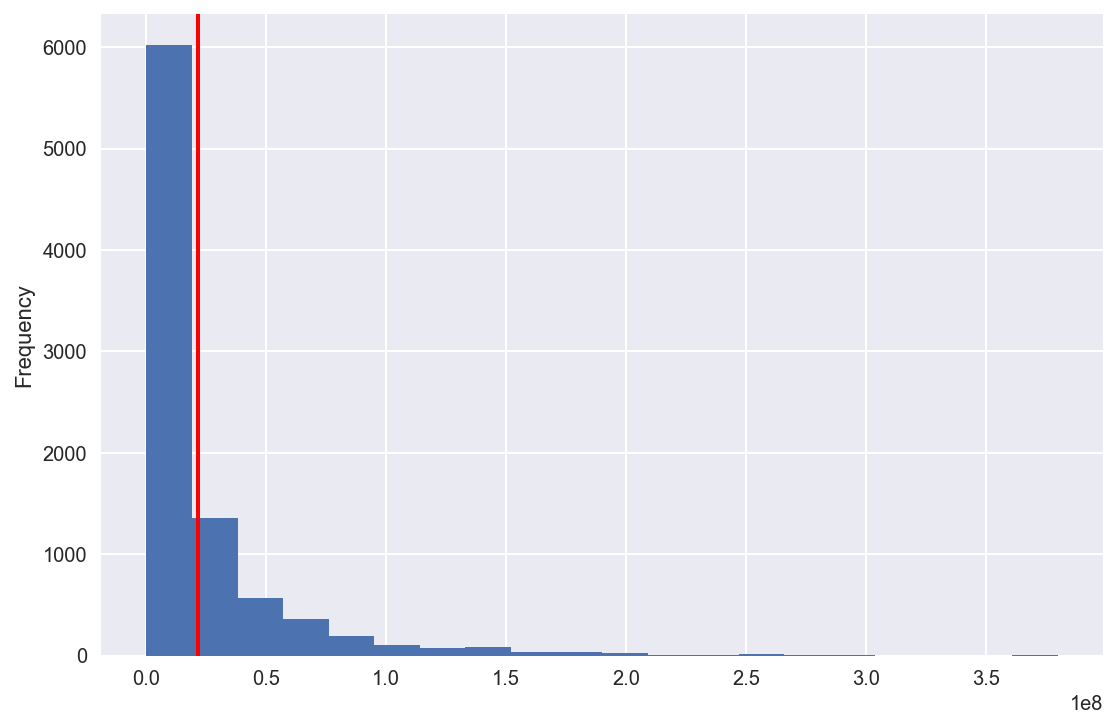

In [24]:
fig, ax = plt.subplots()
df['budget'].plot.hist(bins=20,ax=ax)
ax.axvline(np.mean(df['budget']),color='r', linestyle='-', linewidth=2)
np.mean(df['budget'])

In [25]:
df['budget'] = df['budget'].fillna(np.mean(df['budget']))

### Revenue

In [26]:
df['revenue'].dtype

dtype('float64')

In [27]:
df['revenue'].isnull().any()

True

In [28]:
df['revenue'] = df['revenue'].fillna(df['revenue'].median())

In [29]:
df[['title','revenue']].sort_values(by='revenue', ascending=False)

,title,revenue
14551,Avatar,2.787965e+09
26555,Star Wars: The Force Awakens,2.068224e+09
1639,Titanic,1.845034e+09
17818,The Avengers,1.519558e+09
25084,Jurassic World,1.513529e+09
...,...,...
18308,Shockproof,0.000000e+00
18309,Boy Meets Girl,0.000000e+00
18310,Model Shop,0.000000e+00
18311,Broken Lullaby,0.000000e+00


### Original Language

In [30]:
df['original_language'].unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
       'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
       'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', nan, 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo', 'ay',
       'kn', 'eu', 'ne', 'pa', 'ky', 'gl', 'uz', 'sm', 'mt', 'hy', 'iu',
       'lb', 'si'], dtype=object)

In [31]:
df[df['original_language'].isna()].shape # 11 missing language value

(11, 44)

In [32]:
pop_lg = pd.DataFrame(df['original_language'].value_counts()).reset_index()
pop_lg.columns = ['language','movies']
pop_lg.head()

,language,movies
0,en,32264
1,fr,2438
2,it,1528
3,ja,1350
4,de,1080


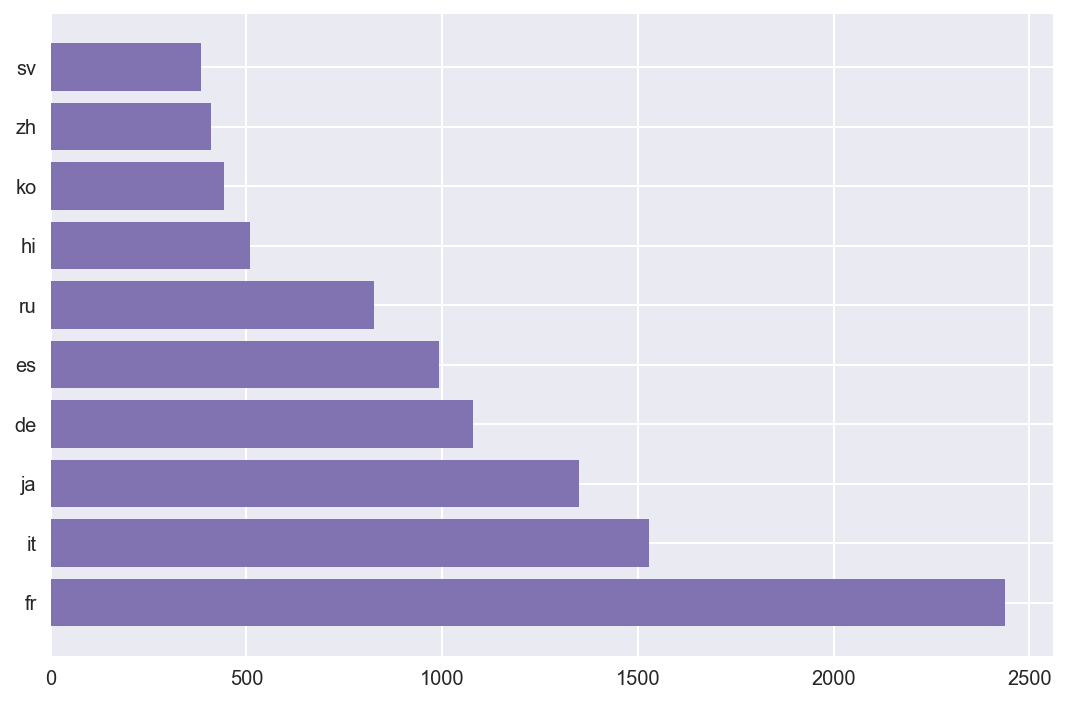

In [33]:
plt.barh('language','movies',data=pop_lg[1:11],color='C3')
plt.show()

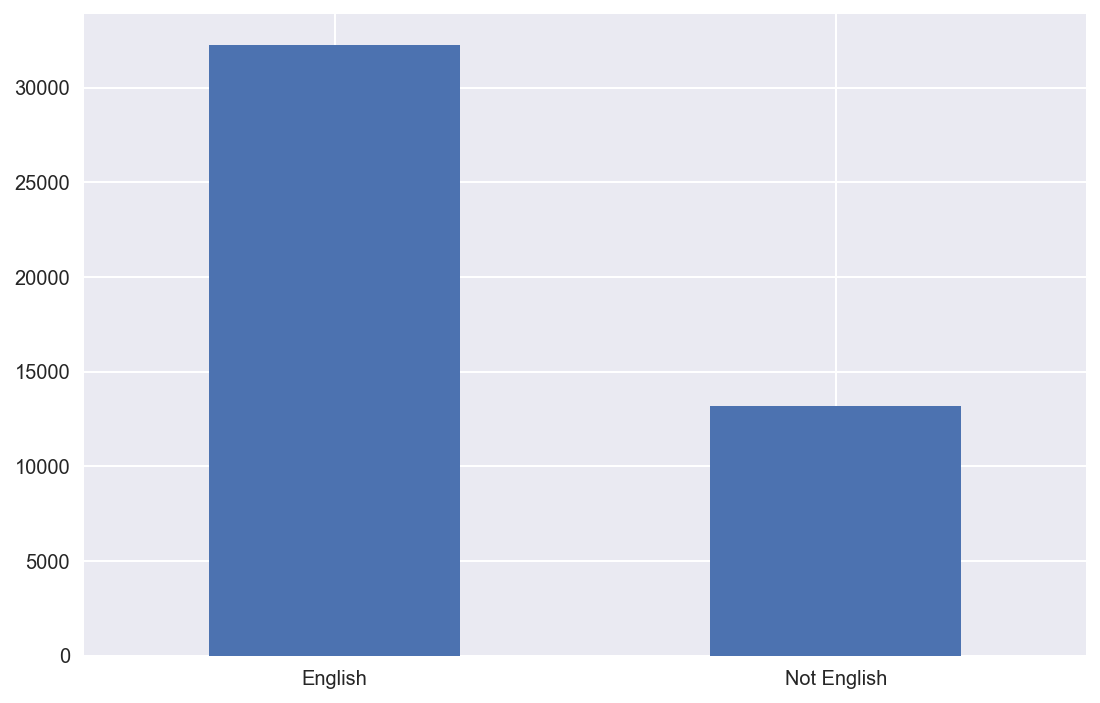

In [34]:
df['is_english'] = df['original_language'].apply(lambda x: 1 if x=='en' else 0)

fig, ax = plt.subplots()
df['is_english'].value_counts().plot.bar(ax=ax)
ax.set_xticklabels(['English','Not English'], rotation=0)

plt.show()

### Overview

In [35]:
df['overview']

0        Led by Woody, Andy's toys live happily in his ...
1        When siblings Judy and Peter discover an encha...
2        A family wedding reignites the ancient feud be...
3        Cheated on, mistreated and stepped on, the wom...
4        Just when George Banks has recovered from his ...
                               ...                        
45461          Rising and falling between a man and woman.
45462    An artist struggles to finish his work while a...
45463    When one of her hits goes wrong, a professiona...
45464    In a small town live two brothers, one a minis...
45465    50 years after decriminalisation of homosexual...
Name: overview, Length: 45454, dtype: object

### Popularity

In [36]:
df['popularity'].isna().any()

True

In [37]:
df['popularity'] = df['popularity'].astype('float')
df['popularity'] = df['popularity'].fillna(df['popularity'].median())
df['popularity'].describe()

count    45454.000000
mean         2.921647
std          6.005730
min          0.000000
25%          0.385982
50%          1.127613
75%          3.679143
max        547.488298
Name: popularity, dtype: float64

In [38]:
df[['title','popularity','vote_count','vote_average']].sort_values(
    by='popularity', ascending=False).head()

,title,popularity,vote_count,vote_average
30700,Minions,547.488298,4729.0,6.4
33356,Wonder Woman,294.337037,5025.0,7.2
42222,Beauty and the Beast,287.253654,5530.0,6.8
43644,Baby Driver,228.032744,2083.0,7.2
24455,Big Hero 6,213.849907,6289.0,7.8


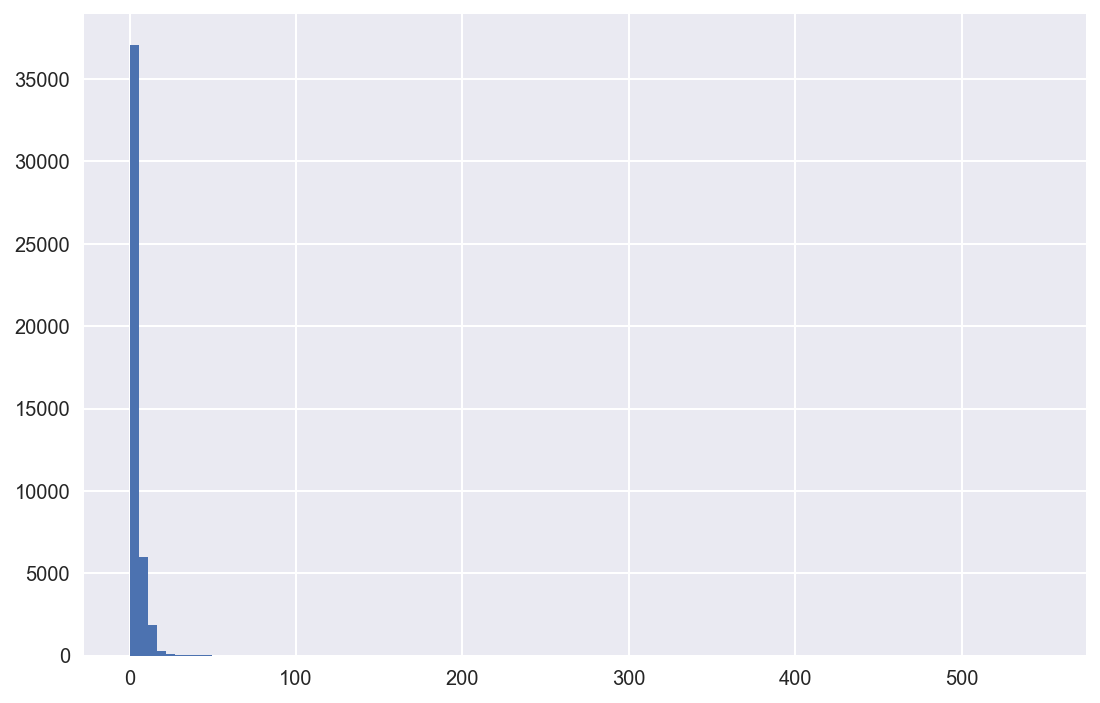

In [39]:
plt.hist(x=df['popularity'],bins=100)
plt.show()

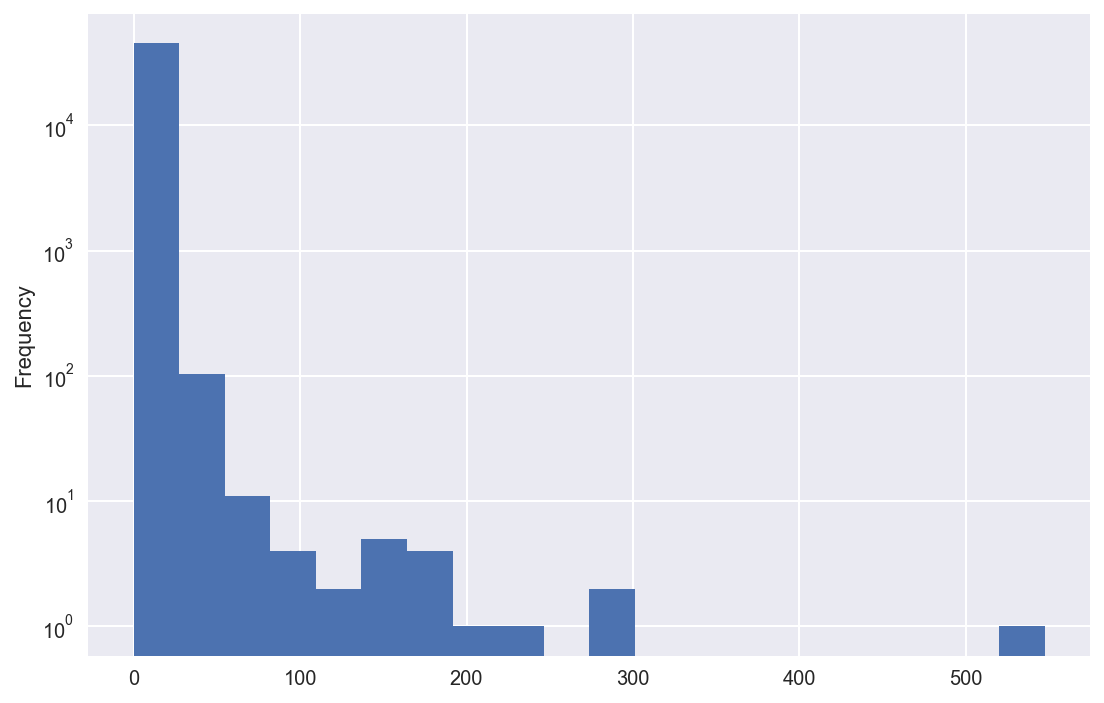

In [40]:
df['popularity'].plot.hist(logy=True, bins=20)
plt.show()

In [41]:
# df['popularity'] = np.log(df.loc[df['popularity']!=0,'popularity'])
# df= df.drop(df.loc[df['vote_count']==0].index)

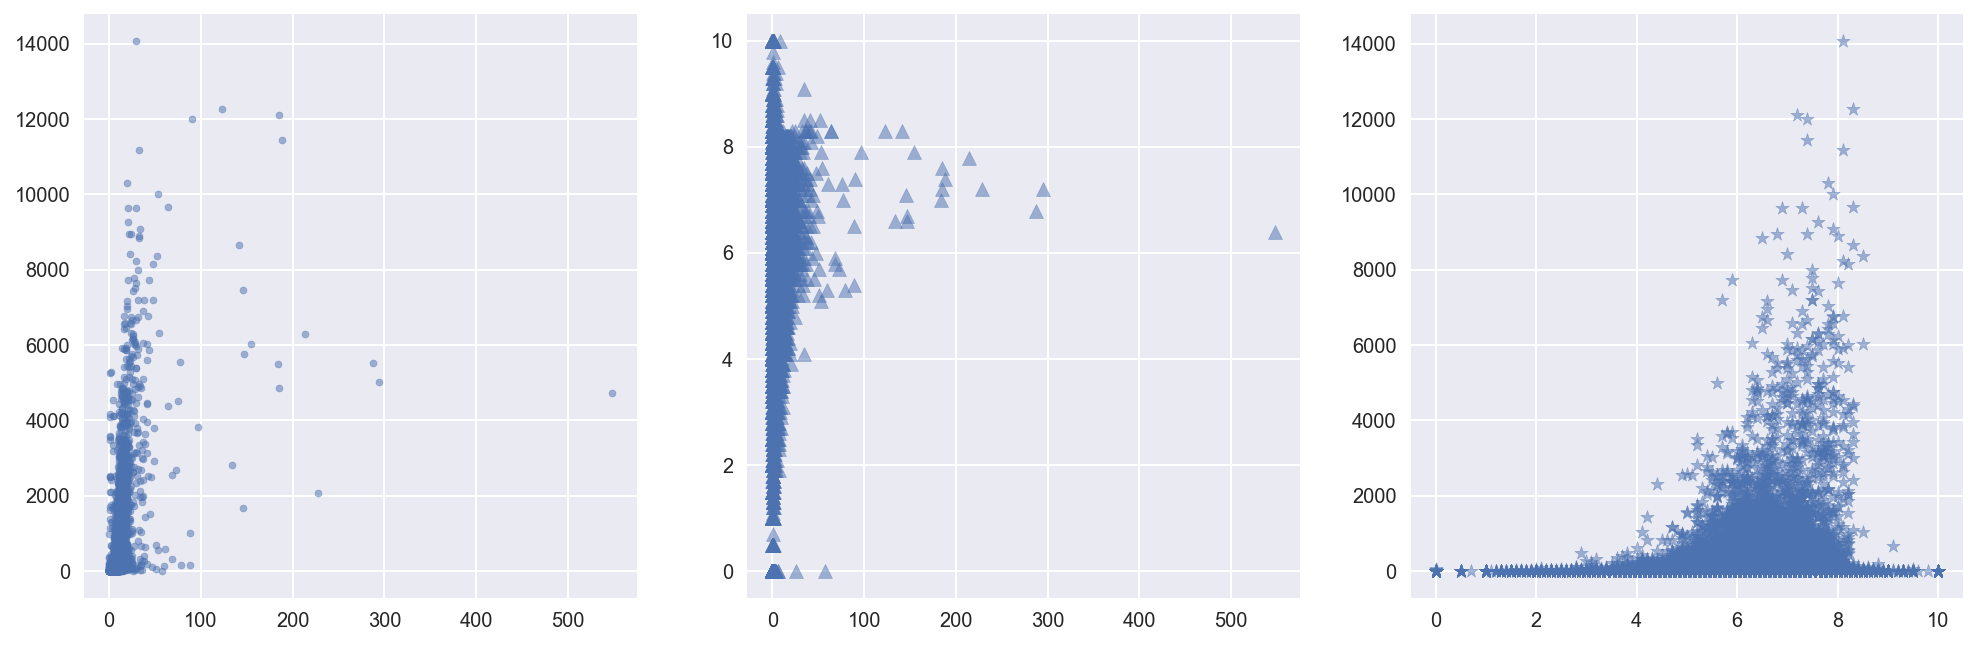

In [42]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].scatter(x=df['popularity'],y=df['vote_count'], marker='.',alpha=0.5)
ax[1].scatter(x=df['popularity'],y=df['vote_average'],marker='^',alpha=0.5)
ax[2].scatter(x=df['vote_average'],y=df['vote_count'],marker="*",alpha=0.5)
plt.show()

In [43]:
# pd.plotting.scatter_matrix(df[['popularity',
#                                'vote_average',
#                                'vote_count']],
#                            figsize=(10,10))

# plt.show()

### Production Companies

In [44]:
df['production_companies'] = df['production_companies'].fillna('[]').apply(
    ast.literal_eval).apply(lambda x: [i['name'] for i in x] 
                            if isinstance(x, list) else [])

In [45]:
df['production_companies'].head()

0                            [Pixar Animation Studios]
1    [TriStar Pictures, Teitler Film, Interscope Co...
2                       [Warner Bros., Lancaster Gate]
3             [Twentieth Century Fox Film Corporation]
4         [Sandollar Productions, Touchstone Pictures]
Name: production_companies, dtype: object

In [46]:
comp = df['production_companies'].apply(
    lambda x: pd.Series(x)).stack().reset_index(level=1, drop=True)
comp.name = 'companies'

<ipython-input-46-ab48b9c90681>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lambda x: pd.Series(x)).stack().reset_index(level=1, drop=True)


In [47]:
comp_df = df.join(comp)
comp_df = comp_df.pivot_table(index='companies',
                              values=['revenue','vote_count','vote_average'],
                              aggfunc={'revenue': ['count',sum, np.mean],
                                       'vote_count': sum,
                                       'vote_average': np.mean}).reset_index()
comp_df.columns = ['company','count','revenue_mean','revenue_total','vote_average','vote_total']

In [48]:
comp_df = comp_df.sort_values(by='vote_total',ascending=False)
comp_df[:10]

,company,count,revenue_mean,revenue_total,vote_average,vote_total
22482,Warner Bros.,1250,5.082015e+07,6.352519e+10,5.838080,565974.0
21855,Universal Pictures,830,6.657734e+07,5.525919e+10,6.089036,405081.0
15710,Paramount Pictures,1003,4.866221e+07,4.880819e+10,5.939980,371175.0
21557,Twentieth Century Fox Film Corporation,836,5.704276e+07,4.768775e+10,6.017584,369545.0
4746,Columbia Pictures,431,7.489498e+07,3.227974e+10,5.882599,263691.0
22443,Walt Disney Pictures,263,1.552748e+08,4.083727e+10,6.238403,247542.0
14608,New Line Cinema,277,8.004834e+07,2.217339e+10,5.900361,177332.0
11891,Legendary Pictures,42,3.206825e+08,1.346866e+10,6.428571,135689.0
22196,Village Roadshow Pictures,106,1.406104e+08,1.490470e+10,6.057547,134924.0
17355,Relativity Media,119,1.227155e+08,1.460315e+10,6.094118,120981.0


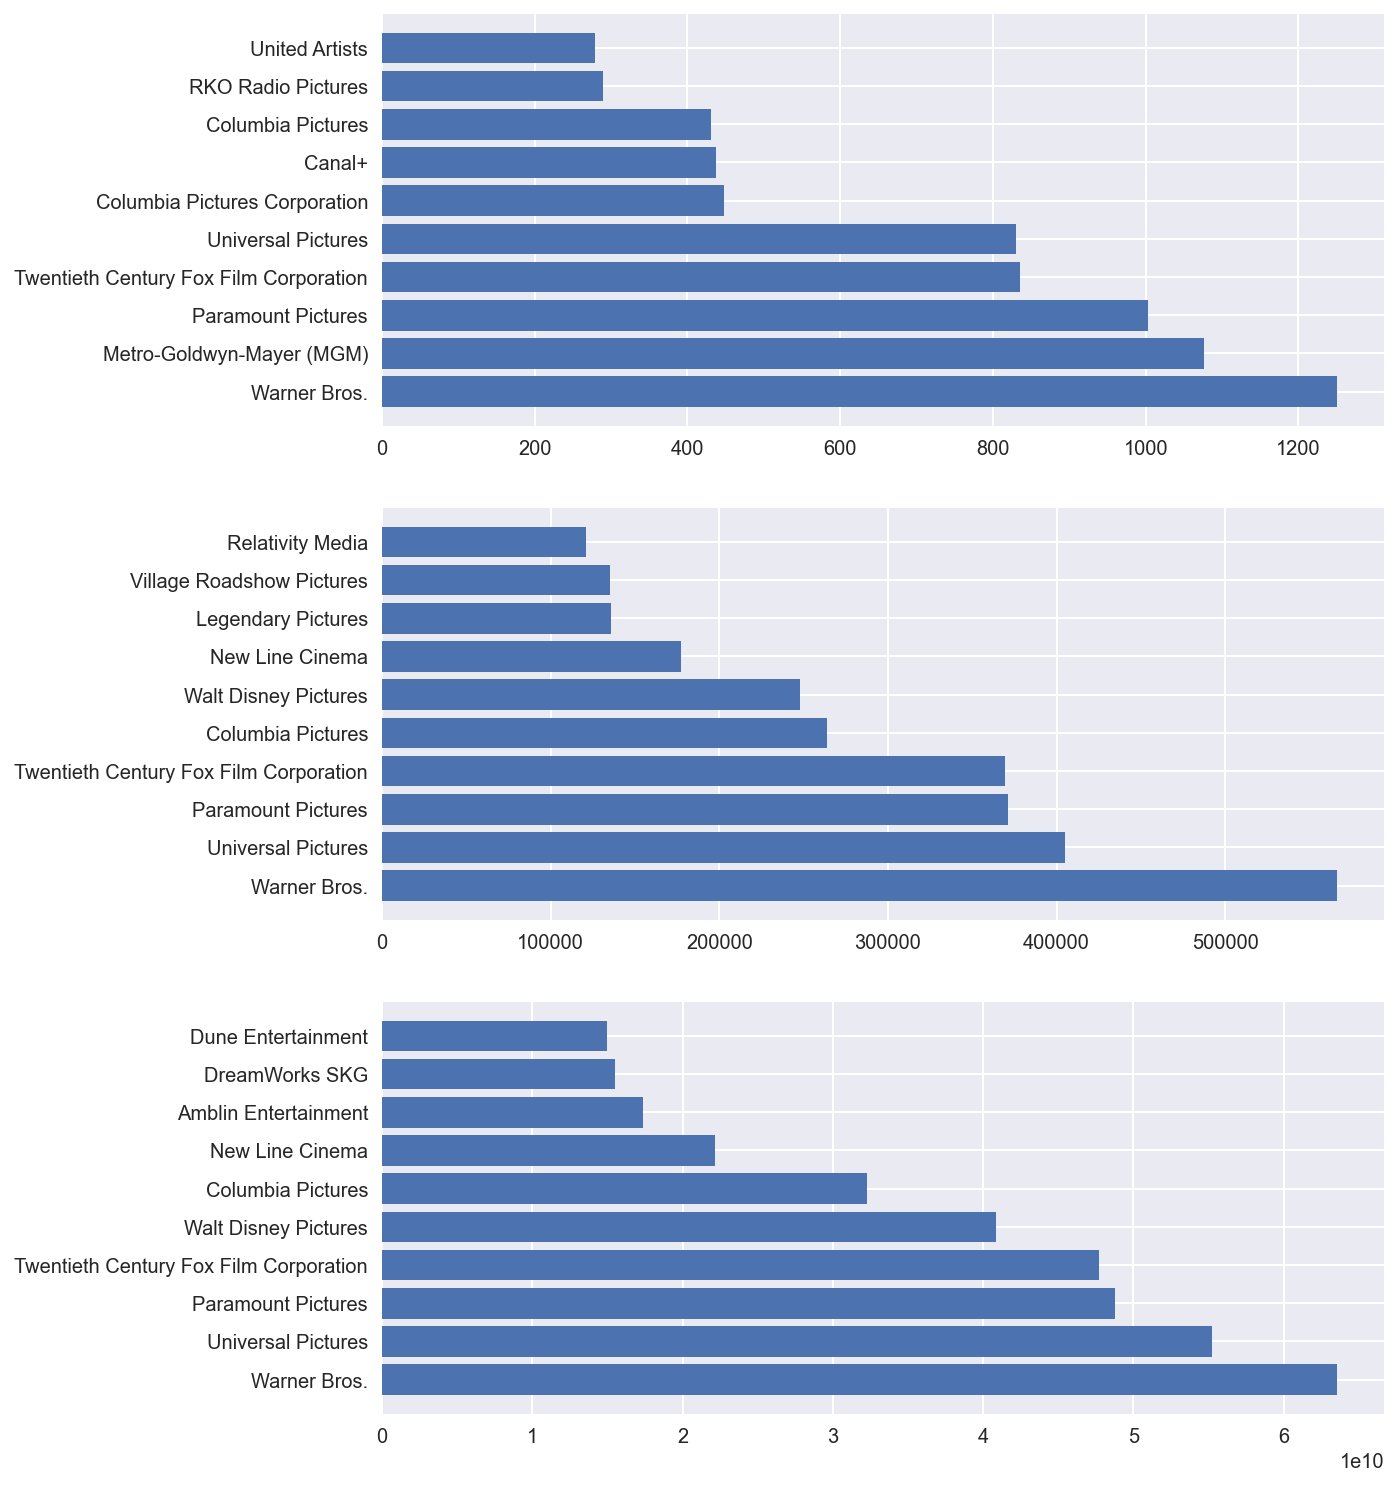

In [49]:
fig, ax = plt.subplots(3,1,figsize=(8,12))
ax[0].barh('company','count',data=comp_df.sort_values(
                            by='count',ascending=False)[:10])
ax[1].barh('company','vote_total',data=comp_df.sort_values(
                            by='vote_total',ascending=False)[:10])
ax[2].barh('company','revenue_total',data=comp_df.sort_values(
                            by='revenue_total',ascending=False)[:10])
plt.show()

In [50]:
companies = comp_df['company'][:50].values
companies

array(['Warner Bros.', 'Universal Pictures', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Columbia Pictures',
       'Walt Disney Pictures', 'New Line Cinema', 'Legendary Pictures',
       'Village Roadshow Pictures', 'Relativity Media',
       'TSG Entertainment', 'Dune Entertainment', 'Amblin Entertainment',
       'DreamWorks SKG', 'Marvel Studios', 'Metro-Goldwyn-Mayer (MGM)',
       'Summit Entertainment', 'Canal+', 'Touchstone Pictures',
       'Pixar Animation Studios', 'Regency Enterprises', 'Lionsgate',
       'Columbia Pictures Corporation', 'Miramax Films', 'Syncopy',
       'DC Entertainment', 'Working Title Films', 'Original Film',
       'Silver Pictures', 'DC Comics', 'DreamWorks Animation',
       'Fox 2000 Pictures', 'Lucasfilm', 'Ingenious Film Partners',
       'TriStar Pictures', 'New Regency Pictures', 'United Artists',
       'WingNut Films', 'Heyday Films', 'The Weinstein Company',
       'Jerry Bruckheimer Films', 'Revolution Sun Studi

In [51]:
df['production_companies']

0                                [Pixar Animation Studios]
1        [TriStar Pictures, Teitler Film, Interscope Co...
2                           [Warner Bros., Lancaster Gate]
3                 [Twentieth Century Fox Film Corporation]
4             [Sandollar Productions, Touchstone Pictures]
                               ...                        
45461                                                   []
45462                                        [Sine Olivia]
45463                            [American World Pictures]
45464                                          [Yermoliev]
45465                                                   []
Name: production_companies, Length: 45454, dtype: object

In [52]:
for comp in companies:
    df[comp] = df['production_companies'].apply(lambda x: 1 if comp in x else 0)
    
df.iloc[:,-50:].head()

,Warner Bros.,Universal Pictures,Paramount Pictures,Twentieth Century Fox Film Corporation,Columbia Pictures,Walt Disney Pictures,New Line Cinema,Legendary Pictures,Village Roadshow Pictures,Relativity Media,...,Jerry Bruckheimer Films,Revolution Sun Studios,Scott Free Productions,Marvel Enterprises,Marvel Entertainment,Studio Babelsberg,Donners' Company,Bad Hat Harry Productions,Scott Rudin Productions,Ingenious Media
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df = df.drop(columns=['adult','homepage','genres','original_language','original_title','overview',
                      'poster_path','production_countries', 'release_date', 'revenue', 'runtime',
                      'spoken_languages', 'status', 'tagline','video','popularity','vote_count',
                      'production_companies'])

In [54]:
df.columns

Index(['belongs_to_collection', 'budget', 'id', 'imdb_id', 'title',
       'vote_average', 'Drama', 'Crime', 'Thriller', 'War', 'History',
       'Animation', 'Fantasy', 'Comedy', 'Western', 'Mystery', 'Family',
       'Action', 'Music', 'Documentary', 'Foreign', 'Science Fiction',
       'Adventure', 'Romance', 'TV Movie', 'Horror', 'is_english',
       'Warner Bros.', 'Universal Pictures', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Columbia Pictures',
       'Walt Disney Pictures', 'New Line Cinema', 'Legendary Pictures',
       'Village Roadshow Pictures', 'Relativity Media', 'TSG Entertainment',
       'Dune Entertainment', 'Amblin Entertainment', 'DreamWorks SKG',
       'Marvel Studios', 'Metro-Goldwyn-Mayer (MGM)', 'Summit Entertainment',
       'Canal+', 'Touchstone Pictures', 'Pixar Animation Studios',
       'Regency Enterprises', 'Lionsgate', 'Columbia Pictures Corporation',
       'Miramax Films', 'Syncopy', 'DC Entertainment', 'Working Title Fi

In [55]:
# df.to_csv("data/movies_metadata_first12.csv")

In [177]:
movie = pd.read_csv('data/movies_ratings.csv',index_col=[0])

In [178]:
movie.drop(movie.columns[78:238],axis=1, inplace=True)

In [179]:
movie.drop(movie.columns[80:213],axis=1, inplace=True)

In [180]:
movie = movie.drop(columns=['vote_average', 'vote_count'])

In [181]:
X = movie.iloc[:,1:]
y = movie['rating_avg']